In [20]:
import pandas as pd
import preprocessing
from sklearn.impute import SimpleImputer


In [21]:
test_data = pd.read_csv('./data/test_set_VU_DM.csv')
print(test_data.describe())
nan_data_info = pd.DataFrame({'NaN Count': test_data.isna().sum(), 'Data Type': test_data.dtypes})
print(nan_data_info)

            srch_id       site_id  visitor_location_country_id  \
count  4.959183e+06  4.959183e+06                 4.959183e+06   
mean   1.666460e+05  9.979214e+00                 1.752504e+02   
std    9.614992e+04  7.667722e+00                 6.590284e+01   
min    1.000000e+00  1.000000e+00                 1.000000e+00   
25%    8.331150e+04  5.000000e+00                 1.000000e+02   
50%    1.670950e+05  5.000000e+00                 2.190000e+02   
75%    2.499660e+05  1.400000e+01                 2.190000e+02   
max    3.327870e+05  3.400000e+01                 2.310000e+02   

       visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
count            253431.000000         254624.000000     4.959183e+06   
mean                  3.374933            177.150730     1.738371e+02   
std                   0.691920            109.592336     6.835006e+01   
min                   1.000000              0.000000     1.000000e+00   
25%                   2.930000          

In [22]:
data_without_date = test_data.drop(columns=['date_time'])

preprocessing.merge_comp(data_without_date)
print(data_without_date)


         srch_id  site_id  visitor_location_country_id  \
0              1       24                          216   
1              1       24                          216   
2              1       24                          216   
3              1       24                          216   
4              1       24                          216   
...          ...      ...                          ...   
4959178   332787       24                          216   
4959179   332787       24                          216   
4959180   332787       24                          216   
4959181   332787       24                          216   
4959182   332787       24                          216   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
0                            NaN                   NaN              219   
1                            NaN                   NaN              219   
2                            NaN                   NaN              219   
3  

In [23]:
# fill_columns = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score', 'orig_destination_distance']

imputer = SimpleImputer(strategy='constant', fill_value=-10)
print(imputer)
filled_data = imputer.fit_transform(data_without_date)
filled_data = pd.DataFrame(filled_data, columns=data_without_date.columns)

print(filled_data)

SimpleImputer(fill_value=-10, strategy='constant')
          srch_id  site_id  visitor_location_country_id  \
0             1.0     24.0                        216.0   
1             1.0     24.0                        216.0   
2             1.0     24.0                        216.0   
3             1.0     24.0                        216.0   
4             1.0     24.0                        216.0   
...           ...      ...                          ...   
4959178  332787.0     24.0                        216.0   
4959179  332787.0     24.0                        216.0   
4959180  332787.0     24.0                        216.0   
4959181  332787.0     24.0                        216.0   
4959182  332787.0     24.0                        216.0   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
0                          -10.0                 -10.0            219.0   
1                          -10.0                 -10.0            219.0   
2              

In [24]:
import joblib

model = joblib.load('models/Lasso_2024-04-29.pkl')

prediction = model.predict(filled_data)
print(prediction)

[23.06641627 22.70102213 21.98038139 ... 13.04956745 23.21919997
 23.67656045]


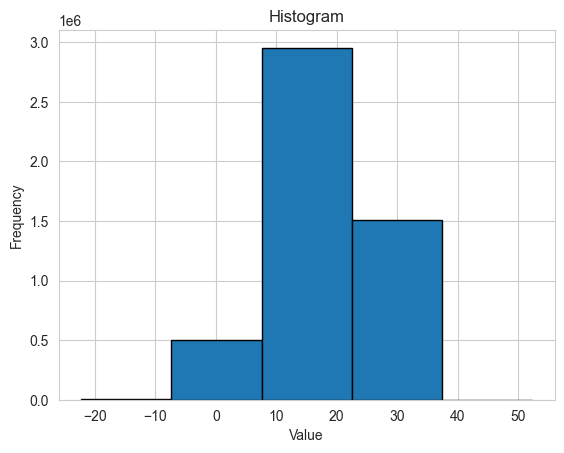

In [25]:
from matplotlib import pyplot as plt

plt.hist(prediction, bins=5, edgecolor='black')  # 设置直方柱的数量为5，边缘颜色为黑色
plt.xlabel('Value')  # 设置x轴标签
plt.ylabel('Frequency')  # 设置y轴标签
plt.title('Histogram')  # 设置标题
plt.grid(True)  # 添加网格线
plt.show()

In [30]:
# label = test_data.score

result = test_data[['srch_id', 'prop_id']]
result['score'] = prediction
# result['label'] = label
result['rank'] = result.groupby('srch_id')['score'].rank(ascending=False) 
print(result)

sorted_df = result.sort_values(by=['srch_id', 'score'], ascending=[True, False])

# 输出sid和pid
output = sorted_df[['srch_id', 'prop_id']]
print(output)
output.to_csv('./data/output.csv', index=False)

C:\Users\china\AppData\Local\Temp\ipykernel_15696\2739679917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['score'] = prediction
C:\Users\china\AppData\Local\Temp\ipykernel_15696\2739679917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['rank'] = result.groupby('srch_id')['score'].rank(ascending=False)


         srch_id  prop_id      score  rank
0              1     3180  23.066416  10.0
1              1     5543  22.701022  17.0
2              1    14142  21.980381  26.0
3              1    22393  22.779239  11.0
4              1    24194  22.679933  19.0
...          ...      ...        ...   ...
4959178   332787    32019  23.511891   4.0
4959179   332787    33959  23.933709   2.0
4959180   332787    35240  13.049567   7.0
4959181   332787    94437  23.219200   6.0
4959182   332787    99509  23.676560   3.0

[4959183 rows x 4 columns]
         srch_id  prop_id
9              1    54937
23             1    99484
12             1    61934
8              1    50162
5              1    28181
...          ...      ...
4959182   332787    99509
4959178   332787    32019
4959177   332787    29018
4959181   332787    94437
4959180   332787    35240

[4959183 rows x 2 columns]
